<a href="https://colab.research.google.com/github/jiin124/Dacon/blob/main/%EC%87%BC%ED%95%91%EB%AA%B0_%EC%A7%80%EC%A0%90%EB%B3%84_%EB%A7%A4%EC%B6%9C%EC%95%A1_%EC%98%88%EC%B8%A1/%EC%87%BC%ED%95%91%EB%AA%B0_%EC%A7%80%EC%A0%90%EB%B3%84_%EB%A7%A4%EC%B6%9C%EC%95%A1_%EC%98%88%EC%B8%A1_%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 쇼핑몰 지점별 매출액 예측


https://dacon.io/competitions/official/235942/data

## train data
- id : 샘플 아이디
- Store : 쇼핑몰 지점
- Date : 주 단위(Weekly) 날짜
- Temperature : 해당 쇼핑몰 주변 기온
- Fuel_Price : 해당 쇼핑몰 주변 연료 가격
- Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보
- Unemployment : 해당 쇼핑몰 지역의 실업률
- IsHoliday : 해당 기간의 공휴일 포함 여부
- Weekly_Sales : 주간 매출액 (목표 예측값)


## test data

- id : 샘플 아이디
- Store : 쇼핑몰 지점
- Date : 주 단위(Weekly) 날짜
- Temperature : 해당 쇼핑몰 주변 기온
- Fuel_Price : 해당 쇼핑몰 주변 연료 가격
- Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보
- Unemployment : 해당 쇼핑몰 지역의 실업률
- IsHoliday : 해당 기간의 공휴일 포함 여부

어떤 프로모션을 진행해야 판매량이 올라갈까요?💥

매장 주변의 날씨가 판매량에 영향을 미치지는 않을까요?🌞

혹은 지역 사회의 실업률도 영향을 미칠 수 있지 않을까요?



쇼핑몰 매장별 프로모션 정보, 주변 날씨, 실업률, 연료 가격 등의 정보를 바탕으로

쇼핑몰의 각 지점별 주간 매출액을 예측해주세요!

## 해볼 것
- 군집분석


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')


In [162]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
sample=pd.read_csv('/content/sample_submission.csv')

# 1. 데이터 전처리

- NULL값 없애기
- 필요없는 변수 없애기(id)
- date 분리
- isholiday에서 날짜 처리


## id 없애기

In [163]:
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

## NULL값 처리
 promotion의 NAN값들이 많아 다 처리해주겠다. 0으로 처리하겠다. 

In [164]:
train=train.fillna(0)
test=test.fillna(0)

## isholiday에서 숫자로 처리 

휴일은 1로 휴일이 아닌날은 0으로 처리하겠다. 

In [165]:
train['IsHoliday'].value_counts()

False    5805
True      450
Name: IsHoliday, dtype: int64

True가 휴일, False가 휴일이 아닌 것을 알 수 있다. 

In [166]:
train.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'Promotion1',
       'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment',
       'IsHoliday', 'Weekly_Sales'],
      dtype='object')

In [167]:
mapping={True:1,False:0}

train['IsHoliday']=train['IsHoliday'].astype('object')
test['IsHoliday']=test['IsHoliday'].astype('object')

train['IsHoliday']=train['IsHoliday'].map(mapping)
test['IsHoliday']=test['IsHoliday'].map(mapping)

In [168]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6255 non-null   int64  
 1   Date          6255 non-null   object 
 2   Temperature   6255 non-null   float64
 3   Fuel_Price    6255 non-null   float64
 4   Promotion1    6255 non-null   float64
 5   Promotion2    6255 non-null   float64
 6   Promotion3    6255 non-null   float64
 7   Promotion4    6255 non-null   float64
 8   Promotion5    6255 non-null   float64
 9   Unemployment  6255 non-null   float64
 10  IsHoliday     6255 non-null   int64  
 11  Weekly_Sales  6255 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 586.5+ KB


## date 분리

In [169]:
train['date']=pd.to_datetime(train['Date'])
test['date']=pd.to_datetime(test['Date'])

#date 삭제
train.drop('Date',axis=1,inplace=True)
test.drop('Date',axis=1,inplace=True)

# 데이터 전처리 2차

- 날짜 분리하기 

In [170]:
train['year']=train['date'].dt.year
train['month']=train['date'].dt.month
train['day']=train['date'].dt.day
train['weekday']=train['date'].dt.weekday

In [171]:
test['year']=test['date'].dt.year
test['month']=test['date'].dt.month
test['day']=test['date'].dt.day
test['weekday']=test['date'].dt.weekday

In [172]:
train.drop('date',axis=1,inplace=True)
test.drop('date',axis=1,inplace=True)

# 데이터 전처리 3차

StandardScaler적용

In [160]:
col=train.columns
col=[ 'Temperature', 'Fuel_Price', 'Promotion1', 'Promotion2',
       'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment', 'IsHoliday',
       'Weekly_Sales', 'year', 'month', 'day', 'weekday']

In [161]:
from sklearn.preprocessing import StandardScaler

st=StandardScaler()
for i in col:
  train[i]=st.fit_transform(train[i].values.reshape(-1,1))


display(train.head())


,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,year,month,day,weekday
0,1,-0.984245,-1.696293,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303,0.040947,-0.278423,1.054265,-1.186139,-0.422164,-1.548487,1.700809
1,1,-1.188298,-1.749003,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303,0.040947,3.591657,1.051199,-1.186139,1.695186,-1.548487,-0.422656
2,1,-1.112046,-1.823674,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303,0.040947,-0.278423,0.998157,-1.186139,-1.329600,0.382423,0.285166
3,1,-0.752268,-1.720452,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303,0.040947,-0.278423,0.640457,-1.186139,-1.329600,1.177504,0.285166
4,1,-0.759249,-1.579894,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303,0.040947,-0.278423,0.897056,-1.186139,-0.422164,-1.434904,-2.546121


In [ ]:
y_train.head()

0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

# 군집 분석

In [173]:
df=train.copy()

In [174]:
from sklearn.cluster import KMeans

In [175]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(df)

KMeans(n_clusters=4, random_state=0)

In [176]:
print(kmeans.labels_[:280])

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 0 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 0 0 0 3 3 3 3 3 3 0 0 3 3 3 3
 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0
 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2]


In [177]:
df['cluster']=kmeans.labels_

In [178]:
result=df.groupby(['Store','cluster'])['Weekly_Sales'].count()

In [179]:
result=pd.DataFrame(result)

In [180]:
result

Weekly_Sales
Store cluster              
1     0                  11
      3                 128
2     0                 131
      3                   8
3     2                 139
...                     ...
43    2                 133
44    2                 139
45    1                 123
      2                  13
      3                   3

[97 rows x 1 columns]

In [181]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(train)

df['pca_x']=pca_transformed[:,0]
df['pca_y']=pca_transformed[:,1]
df.head(3)

,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,year,month,day,weekday,cluster,pca_x,pca_y
0,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,0,1643690.90,2010,5,2,6,3,596061.288830,-4435.032851
1,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,1,1641957.44,2010,12,2,3,3,594327.835353,-4430.928293
2,1,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,0,1611968.17,2010,2,19,4,3,564338.677995,-4359.927011


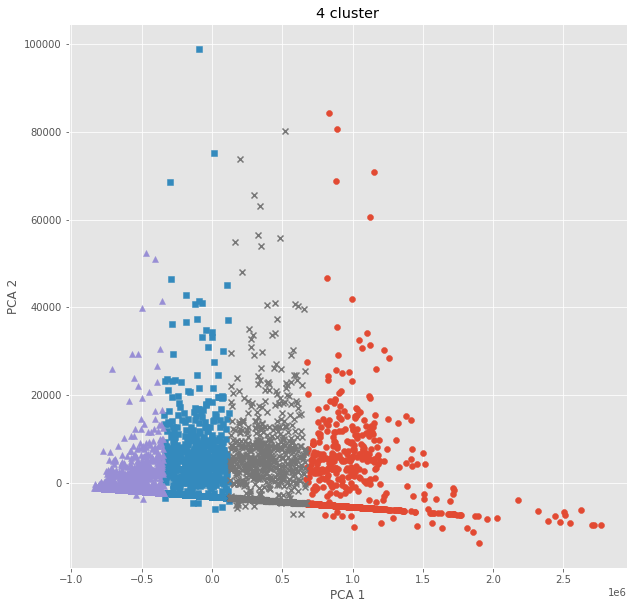

In [182]:
plt.figure(figsize=(10,10))
marker0_ind=df[df['cluster']==0].index
marker1_ind=df[df['cluster']==1].index
marker2_ind=df[df['cluster']==2].index
marker3_ind=df[df['cluster']==3].index
#marker4_ind=df[df['cluster']==4].index

plt.scatter(x=df.loc[marker0_ind,'pca_x'],y=df.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=df.loc[marker1_ind,'pca_x'],y=df.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=df.loc[marker2_ind,'pca_x'],y=df.loc[marker2_ind,'pca_y'],marker='^')
plt.scatter(x=df.loc[marker3_ind,'pca_x'],y=df.loc[marker3_ind,'pca_y'],marker='x')
#plt.scatter(x=df.loc[marker4_ind,'pca_x'],y=df.loc[marker4_ind,'pca_y'],marker='*')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('4 cluster')

plt.show()

In [183]:
df.groupby('cluster').mean()

,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,year,month,day,weekday,pca_x,pca_y
cluster,,,,,,,,,,,,,,,,,
0,12.712914,60.409370,3.328485,3461.801334,1453.976670,1719.306190,1558.835955,2210.171996,7.548870,0.088581,2.024947e+06,2010.868730,6.810032,15.678762,3.574173,977329.679077,-929.545513
1,25.809927,55.923178,3.349909,2759.929903,964.457718,241.233668,1104.937633,1400.834153,8.253713,0.065375,9.370562e+05,2010.923123,6.296005,15.819007,3.615012,-110562.056714,588.446042
2,25.977190,63.174325,3.330216,942.182217,296.807705,43.293203,313.349430,738.072646,8.153247,0.070255,4.712310e+05,2010.953923,6.276004,15.589416,3.604471,-576391.083289,-470.786517
3,21.962687,62.300814,3.369305,3509.763080,1126.372802,442.654573,1581.899179,2411.605251,7.898594,0.071235,1.407413e+06,2010.963365,6.421981,15.460651,3.580733,359796.379217,631.502937


### < 군집 정리 > 

각 군집에서 연료 가격은 별다른 특성이 없음. 

- Weekly sales : 1, 2,0,3 순으로 큼
- temperature : 1,0,3,2 순으로 낮음
- promotion : 2는 가장 낮음. 
- unemployment : 1,2,3,0 순으로 높음


In [107]:
df[df['cluster']==0]['Store'].value_counts()

20    139
4     139
13    135
2     131
14    120
10    112
27     78
6      14
1      11
39     10
23      8
19      7
11      6
28      5
24      4
31      4
41      4
35      3
18      2
22      2
32      2
12      1
Name: Store, dtype: int64

In [108]:
df[df['cluster']==1]['Store'].value_counts()

34    134
8     134
40    133
17    132
26    132
12    130
22    127
45    123
35    112
18    112
21     95
32     92
25     51
41     39
28     28
23     18
7      11
24     11
15     10
29      7
43      6
11      5
9       5
16      3
39      2
Name: Store, dtype: int64

In [109]:
df[df['cluster']==2]['Store'].value_counts()

3     139
33    139
44    139
42    139
38    139
37    139
36    139
5     139
30    139
16    136
9     134
43    133
29    132
7     128
15    127
25     86
21     40
45     13
35     10
18      1
17      1
Name: Store, dtype: int64

In [110]:
df[df['cluster']==3]['Store'].value_counts()

31    135
19    132
1     128
11    128
39    127
6     125
24    124
23    113
28    106
41     96
27     61
32     45
10     27
18     24
14     19
35     14
22     10
2       8
12      8
26      7
17      6
40      6
34      5
8       5
21      4
13      4
45      3
25      2
15      2
Name: Store, dtype: int64